In [32]:
import pandas as pd
from scipy import signal
import numpy as np
import matplotlib as plt
import time

import matplotlib.pyplot as plt
import warnings
import re

import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Ignore all warnings
warnings.filterwarnings("ignore")

In [39]:
passing = pd.read_csv("data/Cleaned_Passing.csv")
rushing = pd.read_csv("data/Cleaned_Rushing.csv")
receiving = pd.read_csv("data/Cleaned_Receiving.csv")

In [50]:
passing = passing[passing["Next_Year_PosRank"] != 0]
rushing = rushing[rushing["Next_Year_PosRank"] != 0]
receiving = receiving[receiving["Next_Year_PosRank"] != 0]

passing.reset_index(drop=True, inplace=True)
rushing.reset_index(drop=True, inplace=True)
receiving.reset_index(drop=True, inplace=True)

In [51]:
df_list = [passing, rushing, receiving]
for df in df_list:
    for index in range(passing.shape[0]):
        stop = 0
        order = 1
        value = df["Next_Year_PosRank"][index]

        while stop == 0:
            if value <= 10:
                
                df.loc[[index], ['Next_Year_PosRank']] = order * 10
                stop = 1
               
            elif order >= 5:
                df.loc[[index], ['Next_Year_PosRank']] = 50
                stop = 1
                
            else:
                value -= 10
                order += 1
                
            
        

# Function

In [42]:
def UMAP_Vis(df):
    columns_for_umap = [col for col in df.columns if col not in ['Player', 'Year', 'Tm']]

    # Separating the data for UMAP
    data_for_umap = df[columns_for_umap]

    # Standardizing the data
    scaler = StandardScaler()
    data_for_umap_scaled = scaler.fit_transform(data_for_umap)

    # Applying UMAP with 3 components
    umap_result = umap.UMAP(n_components=3).fit_transform(data_for_umap_scaled)

    # Creating a DataFrame for the UMAP results
    umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2', 'UMAP3'])

    # Concatenating the 'Player' and 'Year' columns back to the UMAP DataFrame
    umap_df[['Player', 'Year']] = df[['Player', 'Year']]

    # Concatenating the 'Tm' column back to the UMAP DataFrame
    umap_df['Tm'] = df['Tm']

    # Concatenating the 'Next_Year_PosRank' column for analysis
    umap_df['Next_Year_PosRank'] = df['Next_Year_PosRank']

    # Create a colormap
    cmap = ListedColormap(['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w'])  # Adjust colors as needed

    # Create a 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Extract UMAP1, UMAP2, and UMAP3 from the UMAP DataFrame
    umap1 = umap_df['UMAP1']
    umap2 = umap_df['UMAP2']
    umap3 = umap_df['UMAP3']

    # Plot the UMAP results with colors based on Next_Year_PosRank
    scatter = ax.scatter(umap1, umap2, umap3, c=umap_df['Next_Year_PosRank'], cmap=cmap, marker='o')

    # Set labels and title
    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')
    ax.set_zlabel('UMAP3')
    ax.set_title('UMAP Visualization')

    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Next_Year_PosRank')

    # Show plot
    plt.show()
    
    # Fit K-means clustering model
    kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
    kmeans.fit(umap_result)

    # Predict cluster labels
    cluster_labels = kmeans.predict(umap_result)

    # Create a colormap for clusters
    cluster_cmap = ListedColormap(['r', 'g', 'b', 'c', 'm'])  # Adjust colors as needed


    # Create a 3D plot with clusters
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the UMAP results with colors based on cluster labels
    scatter = ax.scatter(umap1, umap2, umap3, c=cluster_labels, cmap=cluster_cmap, marker='o')

    # Set labels and title
    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')
    ax.set_zlabel('UMAP3')
    ax.set_title('UMAP Visualization with K-means Clusters')

    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Cluster')

    # Show plot
    plt.show()


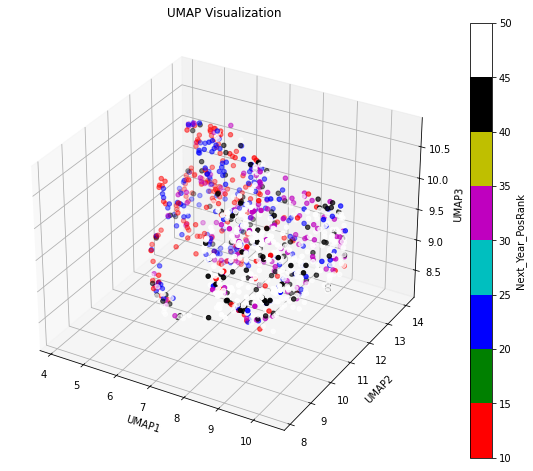

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6363cb8af0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6363cb8af0>
Traceback 

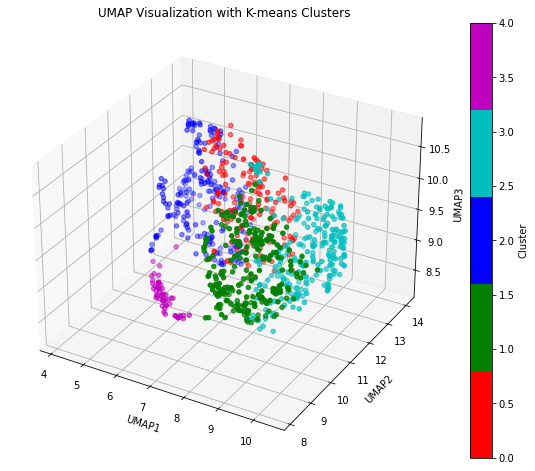

In [43]:
UMAP_Vis(passing)

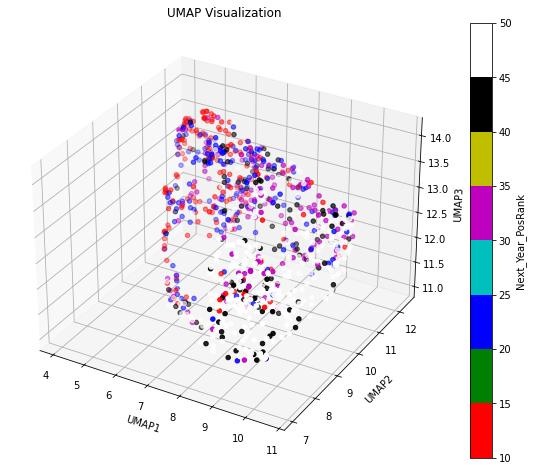

In [13]:
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

df = passing
# Assuming df is your DataFrame with 68 columns
# Extracting only the columns you want for UMAP (excluding 'Player', 'Year', and 'Tm')
columns_for_umap = [col for col in df.columns if col not in ['Player', 'Year', 'Tm']]

# Separating the data for UMAP
data_for_umap = df[columns_for_umap]

# Standardizing the data
scaler = StandardScaler()
data_for_umap_scaled = scaler.fit_transform(data_for_umap)

# Applying UMAP with 3 components
umap_result = umap.UMAP(n_components=3).fit_transform(data_for_umap_scaled)

# Creating a DataFrame for the UMAP results
umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2', 'UMAP3'])

# Concatenating the 'Player' and 'Year' columns back to the UMAP DataFrame
umap_df[['Player', 'Year']] = df[['Player', 'Year']]

# Concatenating the 'Tm' column back to the UMAP DataFrame
umap_df['Tm'] = df['Tm']

# Concatenating the 'Next_Year_PosRank' column for analysis
umap_df['Next_Year_PosRank'] = df['Next_Year_PosRank']

# Create a colormap
cmap = ListedColormap(['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w'])  # Adjust colors as needed

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract UMAP1, UMAP2, and UMAP3 from the UMAP DataFrame
umap1 = umap_df['UMAP1']
umap2 = umap_df['UMAP2']
umap3 = umap_df['UMAP3']

# Plot the UMAP results with colors based on Next_Year_PosRank
scatter = ax.scatter(umap1, umap2, umap3, c=umap_df['Next_Year_PosRank'], cmap=cmap, marker='o')

# Set labels and title
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')
ax.set_title('UMAP Visualization')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Next_Year_PosRank')

# Show plot
plt.show()


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6362289ca0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6362289ca0>
Traceback 

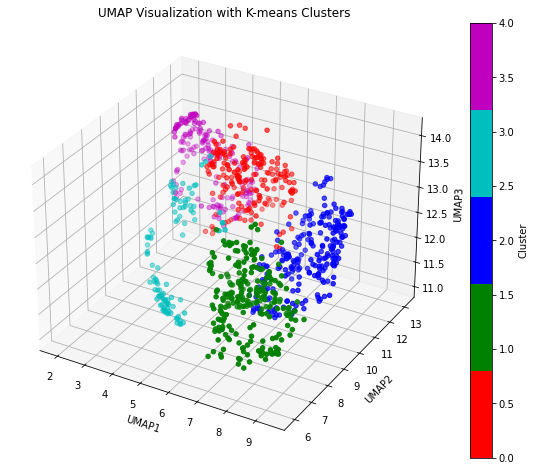

In [21]:
from sklearn.cluster import KMeans

# Fit K-means clustering model
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(umap_result)

# Predict cluster labels
cluster_labels = kmeans.predict(umap_result)

# Create a colormap for clusters
cluster_cmap = ListedColormap(['r', 'g', 'b', 'c', 'm'])  # Adjust colors as needed


# Create a 3D plot with clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the UMAP results with colors based on cluster labels
scatter = ax.scatter(umap1, umap2, umap3, c=cluster_labels, cmap=cluster_cmap, marker='o')

# Set labels and title
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')
ax.set_title('UMAP Visualization with K-means Clusters')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

# Show plot
plt.show()


In [22]:
# Concatenate cluster labels with Next_Year_PosRank
umap_df['Cluster'] = cluster_labels

# Group data by Cluster and Next_Year_PosRank, and count occurrences
cluster_info = umap_df.groupby(['Cluster', 'Next_Year_PosRank']).size().reset_index(name='Count')

# Print the information
print(cluster_info)


    Cluster  Next_Year_PosRank  Count
0         0                 10     31
1         0                 20     59
2         0                 30     39
3         0                 40     31
4         0                 50     26
5         1                 10     11
6         1                 20      8
7         1                 30     16
8         1                 40     37
9         1                 50    169
10        2                 10     11
11        2                 20     24
12        2                 30     41
13        2                 40     35
14        2                 50    124
15        3                 10     28
16        3                 20     29
17        3                 30     12
18        3                 40     10
19        3                 50     25
20        4                 10     88
21        4                 20     48
22        4                 30     23
23        4                 40     10
24        4                 50      6


In [23]:
cluster_info["Total_Count"] = 0
cluster_info["Percentage"] = 0
for rank in range(9):
    rank += 1
    rank *= 10
    
    total = cluster_info[cluster_info["Next_Year_PosRank"] == rank]["Count"].sum()
    
    cluster_info.loc[cluster_info["Next_Year_PosRank"] == rank, ["Total_Count"]] = total
    
    for cluster in range(max(cluster_info["Cluster"]) + 1):
        count = cluster_info[(cluster_info["Next_Year_PosRank"] == rank) & (cluster_info["Cluster"] == cluster)]["Count"]
        cluster_info.loc[(cluster_info["Next_Year_PosRank"] == rank) & (cluster_info["Cluster"] == cluster), ["Percentage"]] = 100*count/total

In [24]:
cluster_info

,Cluster,Next_Year_PosRank,Count,Total_Count,Percentage
0,0,10,31,169,18.343195
1,0,20,59,168,35.119048
2,0,30,39,131,29.770992
3,0,40,31,123,25.203252
4,0,50,26,350,7.428571
5,1,10,11,169,6.508876
6,1,20,8,168,4.761905
7,1,30,16,131,12.213740
8,1,40,37,123,30.081301
9,1,50,169,350,48.285714


# Rushing

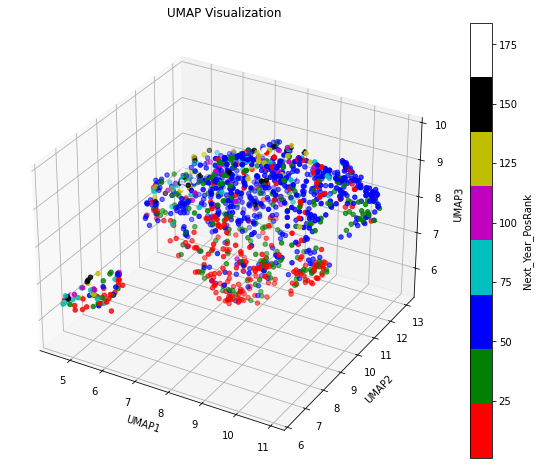

In [25]:
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

df = rushing
# Assuming df is your DataFrame with 68 columns
# Extracting only the columns you want for UMAP (excluding 'Player', 'Year', and 'Tm')
columns_for_umap = [col for col in df.columns if col not in ['Player', 'Year', 'Tm']]

# Separating the data for UMAP
data_for_umap = df[columns_for_umap]

# Standardizing the data
scaler = StandardScaler()
data_for_umap_scaled = scaler.fit_transform(data_for_umap)

# Applying UMAP with 3 components
umap_result = umap.UMAP(n_components=3).fit_transform(data_for_umap_scaled)

# Creating a DataFrame for the UMAP results
umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2', 'UMAP3'])

# Concatenating the 'Player' and 'Year' columns back to the UMAP DataFrame
umap_df[['Player', 'Year']] = df[['Player', 'Year']]

# Concatenating the 'Tm' column back to the UMAP DataFrame
umap_df['Tm'] = df['Tm']

# Concatenating the 'Next_Year_PosRank' column for analysis
umap_df['Next_Year_PosRank'] = df['Next_Year_PosRank']

# Create a colormap
cmap = ListedColormap(['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w'])  # Adjust colors as needed

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract UMAP1, UMAP2, and UMAP3 from the UMAP DataFrame
umap1 = umap_df['UMAP1']
umap2 = umap_df['UMAP2']
umap3 = umap_df['UMAP3']

# Plot the UMAP results with colors based on Next_Year_PosRank
scatter = ax.scatter(umap1, umap2, umap3, c=umap_df['Next_Year_PosRank'], cmap=cmap, marker='o')

# Set labels and title
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')
ax.set_title('UMAP Visualization')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Next_Year_PosRank')

# Show plot
plt.show()


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6339f8e430>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6339f8e430>
Traceback 

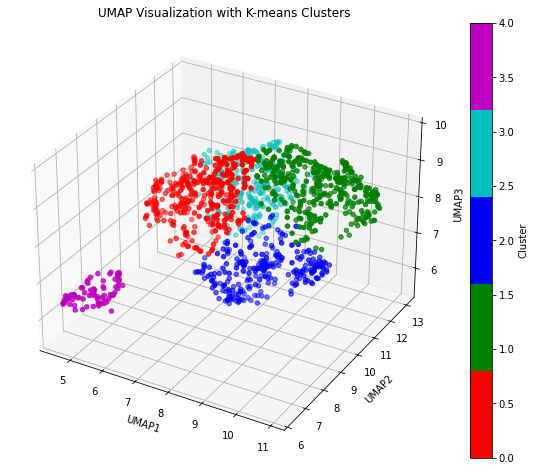

In [26]:
from sklearn.cluster import KMeans

# Fit K-means clustering model
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(umap_result)

# Predict cluster labels
cluster_labels = kmeans.predict(umap_result)

# Create a colormap for clusters
cluster_cmap = ListedColormap(['r', 'g', 'b', 'c', 'm'])  # Adjust colors as needed


# Create a 3D plot with clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the UMAP results with colors based on cluster labels
scatter = ax.scatter(umap1, umap2, umap3, c=cluster_labels, cmap=cluster_cmap, marker='o')

# Set labels and title
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')
ax.set_title('UMAP Visualization with K-means Clusters')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

# Show plot
plt.show()


In [27]:
# Concatenate cluster labels with Next_Year_PosRank
umap_df['Cluster'] = cluster_labels

# Group data by Cluster and Next_Year_PosRank, and count occurrences
cluster_info = umap_df.groupby(['Cluster', 'Next_Year_PosRank']).size().reset_index(name='Count')

# Print the information
print(cluster_info)


     Cluster  Next_Year_PosRank  Count
0          0                  4      1
1          0                  5      1
2          0                  6      2
3          0                  7      1
4          0                  9      1
..       ...                ...    ...
312        4                161      1
313        4                162      1
314        4                165      1
315        4                170      1
316        4                171      1

[317 rows x 3 columns]


In [28]:
cluster_info["Total_Count"] = 0
cluster_info["Percentage"] = 0
for rank in range(9):
    rank += 1
    rank *= 10
    
    total = cluster_info[cluster_info["Next_Year_PosRank"] == rank]["Count"].sum()
    
    cluster_info.loc[cluster_info["Next_Year_PosRank"] == rank, ["Total_Count"]] = total
    
    for cluster in range(max(cluster_info["Cluster"]) + 1):
        count = cluster_info[(cluster_info["Next_Year_PosRank"] == rank) & (cluster_info["Cluster"] == cluster)]["Count"]
        cluster_info.loc[(cluster_info["Next_Year_PosRank"] == rank) & (cluster_info["Cluster"] == cluster), ["Percentage"]] = 100*count/total

In [29]:
cluster_info

,Cluster,Next_Year_PosRank,Count,Total_Count,Percentage
0,0,4,1,0,0.0
1,0,5,1,0,0.0
2,0,6,2,0,0.0
3,0,7,1,0,0.0
4,0,9,1,0,0.0
...,...,...,...,...,...
312,4,161,1,0,0.0
313,4,162,1,0,0.0
314,4,165,1,0,0.0
315,4,170,1,0,0.0


# Receiving

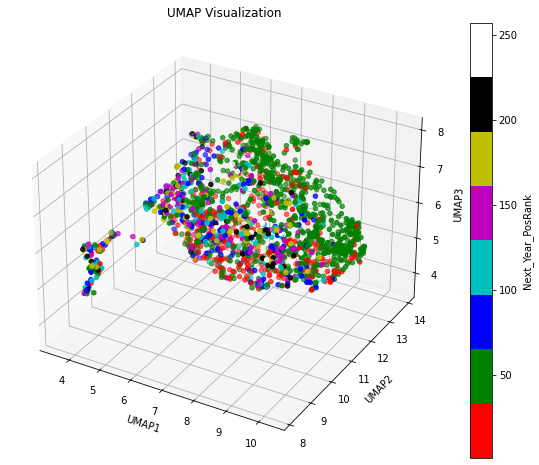

In [30]:
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

df = receiving
# Assuming df is your DataFrame with 68 columns
# Extracting only the columns you want for UMAP (excluding 'Player', 'Year', and 'Tm')
columns_for_umap = [col for col in df.columns if col not in ['Player', 'Year', 'Tm']]

# Separating the data for UMAP
data_for_umap = df[columns_for_umap]

# Standardizing the data
scaler = StandardScaler()
data_for_umap_scaled = scaler.fit_transform(data_for_umap)

# Applying UMAP with 3 components
umap_result = umap.UMAP(n_components=3).fit_transform(data_for_umap_scaled)

# Creating a DataFrame for the UMAP results
umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2', 'UMAP3'])

# Concatenating the 'Player' and 'Year' columns back to the UMAP DataFrame
umap_df[['Player', 'Year']] = df[['Player', 'Year']]

# Concatenating the 'Tm' column back to the UMAP DataFrame
umap_df['Tm'] = df['Tm']

# Concatenating the 'Next_Year_PosRank' column for analysis
umap_df['Next_Year_PosRank'] = df['Next_Year_PosRank']

# Create a colormap
cmap = ListedColormap(['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w'])  # Adjust colors as needed

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract UMAP1, UMAP2, and UMAP3 from the UMAP DataFrame
umap1 = umap_df['UMAP1']
umap2 = umap_df['UMAP2']
umap3 = umap_df['UMAP3']

# Plot the UMAP results with colors based on Next_Year_PosRank
scatter = ax.scatter(umap1, umap2, umap3, c=umap_df['Next_Year_PosRank'], cmap=cmap, marker='o')

# Set labels and title
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')
ax.set_title('UMAP Visualization')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Next_Year_PosRank')

# Show plot
plt.show()


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f67786e7a60>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f67786e7a60>
Traceback 

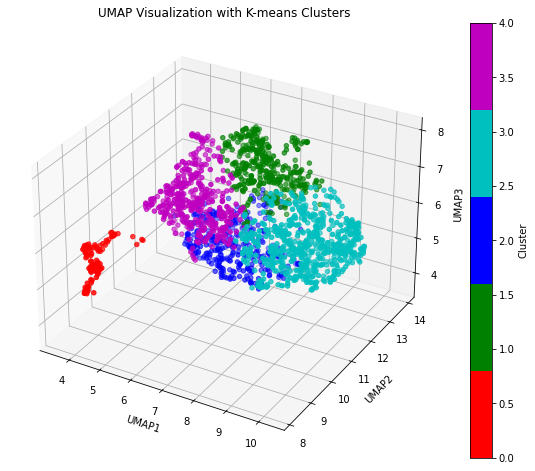

In [31]:
from sklearn.cluster import KMeans

# Fit K-means clustering model
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(umap_result)

# Predict cluster labels
cluster_labels = kmeans.predict(umap_result)

# Create a colormap for clusters
cluster_cmap = ListedColormap(['r', 'g', 'b', 'c', 'm'])  # Adjust colors as needed


# Create a 3D plot with clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the UMAP results with colors based on cluster labels
scatter = ax.scatter(umap1, umap2, umap3, c=cluster_labels, cmap=cluster_cmap, marker='o')

# Set labels and title
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')
ax.set_title('UMAP Visualization with K-means Clusters')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

# Show plot
plt.show()
